# Boston House Price EDA

In [1]:
# Import the pandas library as pd for data manipulation
import pandas as pd

# Import the numpy library as np for numerical operations
import numpy as np

# Import the seaborn library as sns for statistical data visualization
import seaborn as sns

# Import the matplotlib.pyplot module as plt for plotting graphs and visualizations
import matplotlib.pyplot as plt

# Import the warnings module to suppress any warnings that might occur during code execution
import warnings

# Suppress warnings to improve code readability
warnings.filterwarnings('ignore')

**Description of the dataset**

This dataset contains information on houses located in the Boston area, referring to the year 1970. Despite its age, it remains highly valuable for performing exploratory data analysis (EDA) exercises and for applying machine learning models.

In [4]:
df_house = pd.read_csv('data/BostonHousing.csv')

In [5]:
df_house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df_house.shape

(506, 14)

The dataset consists of 506 records, each representing a suburb of Boston. Every record includes 14 features that describe the environmental and urban planning characteristics of the area. The features are as follows:

- **CRIM** (Crime Rate): Crime rate per person
- **ZN** (Residential Land): is the percentage of residential land divided into lots > 25,000 ft²
- **INDUS** (Industrial Land): is the percentage of non-residential area used for business
- **CHAS** (Charles River): 1 if bordering the Charles River, 0 otherwise (binary variable)
- **NOX** (Nitric Oxide): Concentration of nitrogen oxide (in ppm)
- **RM** (Rooms): Average number of rooms per dwelling
- **AGE** (Age of Homes): is the percentage of homes built before 1940
- **DIS** (Distance): average distance to five Boston job centers
- **RAD** (Highway Access): index of accessibility to radial highways
- **TAX** (Property Tax Rate): property tax rate (per $10,000)
- **PTRATIO** (Pupil-Teacher Ratio): pupil-teacher ratio in schools in the area
- **B** (Black Population): is the percentage of blacks in the area
- **LSTAT** (Lower Status): is the percentage of the population with low income
- **MEDV**: median home value in thousands of dollars

In [8]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


It's good to see that each feature doesn't have any null value.

In [9]:
df_house.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Data Exploration**

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

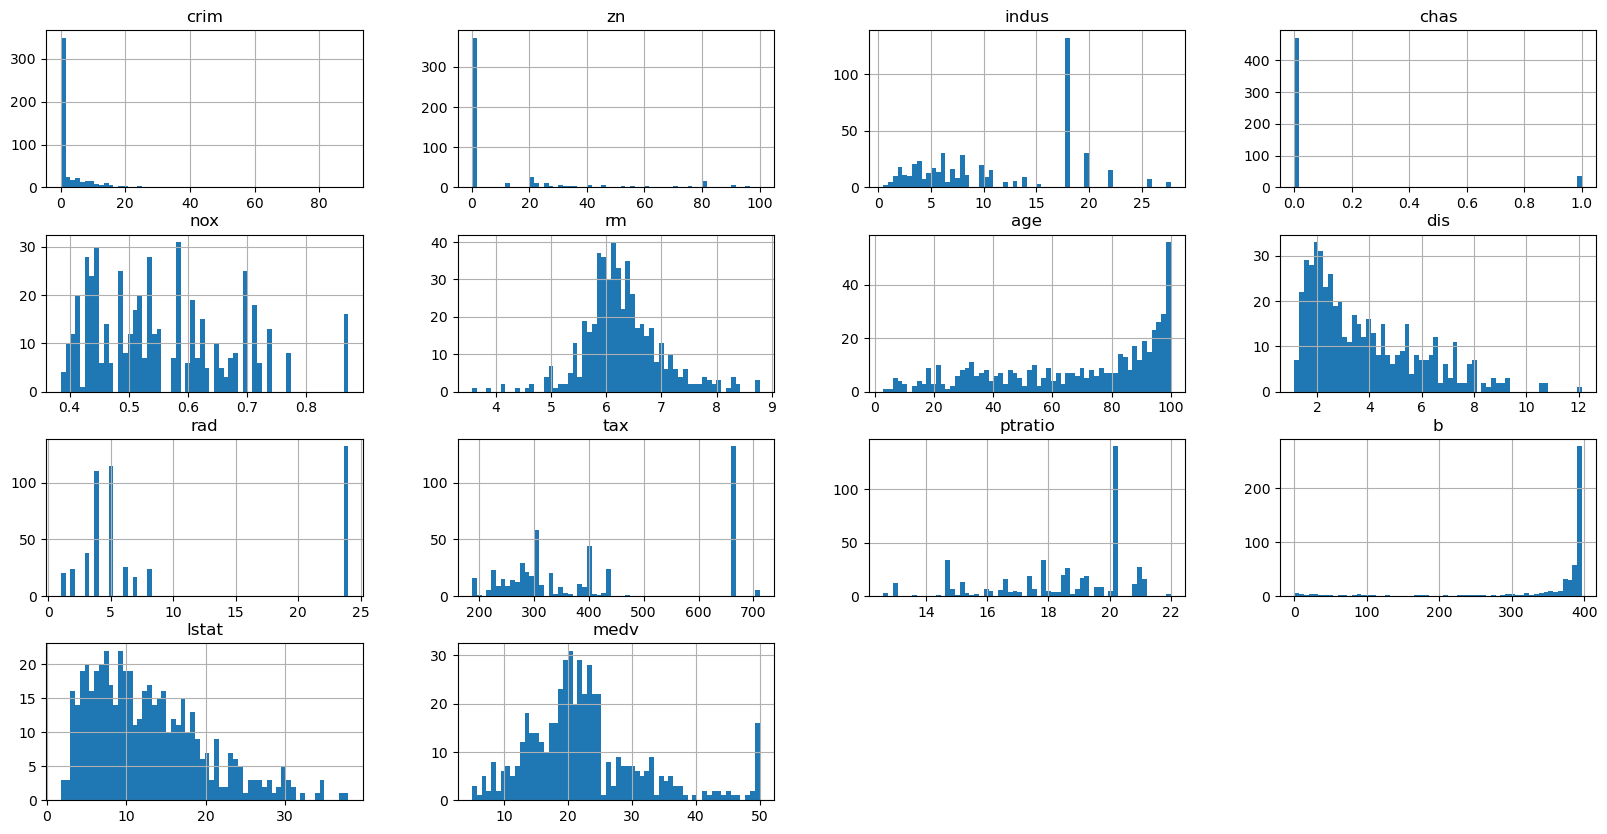

In [12]:
df_house.hist(figsize=(20, 10), bins=60)